<a href="https://colab.research.google.com/github/krishna324-art/Practice_Notebooks/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#step:1:generate n=1000 random samples from a poisson distribution with a mean of lambda
lambda_value=10
N=10000
Datapopulation=np.random.poisson(lam=lambda_value,size=N)

In [ ]:
#step2:draw a random subset of n=30 samples from datapopulation
n=200
Datasample=np.random.choice(Datapopulation,size=n,replace=False)

In [ ]:
#compute the mean and standard deviation of both vectors
mean_population=np.mean(Datapopulation)
std_population=np.std(Datapopulation)

In [ ]:
mean_sample=np.mean(Datasample)
std_sample=np.std(Datasample)

In [ ]:
print("Population Mean:",mean_population)
print("Population Standard Deviation:",std_population)
print("Sample Mean:",mean_sample)
print("Sample Standard Deviation:",std_sample)

Population Mean: 9.9275
Population Standard Deviation: 3.153544632631668
Sample Mean: 9.685
Sample Standard Deviation: 2.9640808018675875


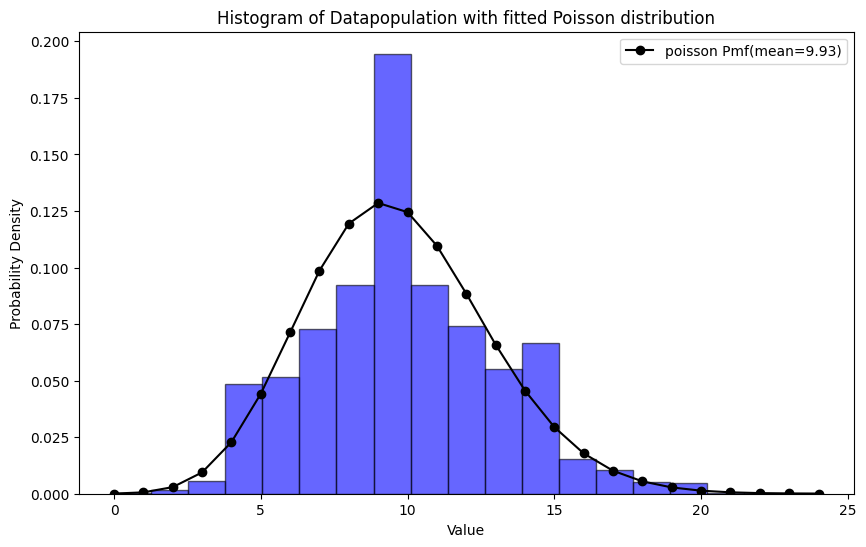

In [ ]:
from scipy.stats import poisson
#generate a histogram of DataPopulation
plt.figure(figsize=(10,6))
counts,bins,_=plt.hist(Datapopulation,bins=19,color='blue',edgecolor='black',alpha=0.6,density=True)
#plot the poisson distribution that best fits the sample mean
x=np.arange(0,bins[-1]+1)
pmf_values=poisson.pmf(x,mu=mean_sample)
plt.plot(x,pmf_values,'k-',marker='o',label=f'poisson Pmf(mean={mean_population:.2f})')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Datapopulation with fitted Poisson distribution')
#add a legend
plt.legend()
#display the plot
plt.show()

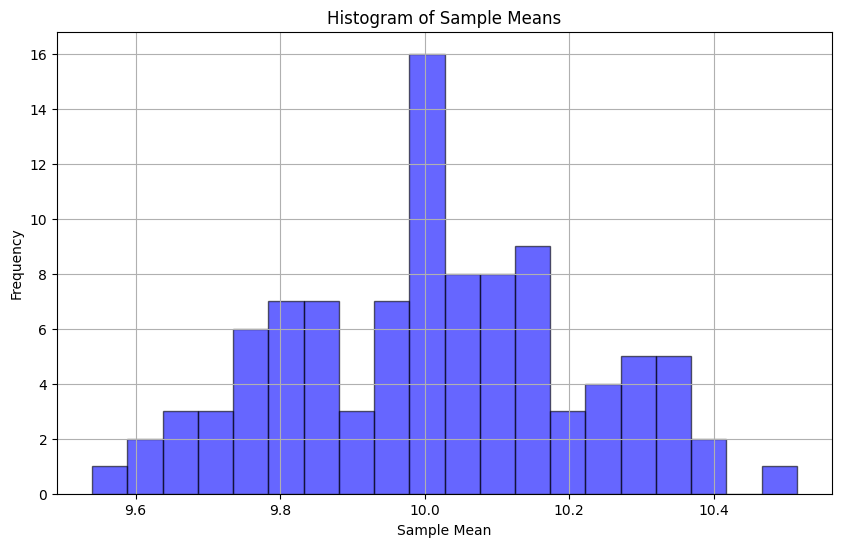

In [ ]:
#np.random.seed(42)
lambda_value=10

#generate N=1000 random samples from a poisson distribution with a mean of lambda
lambda_value=10
N=10000
DataPopulation=np.random.poisson(lam=lambda_value,size=N)
#parameters for sampling
n=200 #sample size
m=100 #number of samples to take

#initialize arrays to store sample means and standard deviation
sample_means=np.zeros(m)
sample_stds=np.zeros(m)

#repeat sampling m times
for i in range(m):
  Datasample=np.random.choice(DataPopulation,size=n,replace=False)
  sample_means[i]=np.mean(Datasample)
  sample_stds[i]=np.std(Datasample)
#plot a histogram of the samplemeans
plt.figure(figsize=(10,6))
plt.hist(sample_means,bins=20,color='blue',edgecolor='black',alpha=0.6)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.grid(True)
plt.show()

***P-hacking:***
i would like to set up the python script to demonstarte a danger associated with p hacking,its a code that generates a random coin is fair or not. i want to start woth n=20 and then increase the number of coin fips to n=50, computing p value each time and then plot the p -value verus n.
the goal is to show that sometimes retesting will cause the p-value to indicate a significant result even if its not true.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

In [ ]:
np.random.seed(41)

In [ ]:
initial_n=20
max_n=50
flips=np.random.binomial(n=1,p=0.5,size=initial_n)

In [ ]:
#initialize the list to store the number of flips and corresponding p-values
n_values=list(range(initial_n+1,max_n))
p_values=[]

In [ ]:
p_values = [] # Re-initialize p_values list for robustness
for n_flips in n_values:
  new_flip=np.random.binomial(n=1,p=0.5)
  flips=np.append(flips,new_flip)
  heads=np.sum(flips)#count the no of heads
  #compute the p-values for the hypothesis that coin is fair(two-tailed test)
  result=binomtest(heads,n=n_flips,p=0.5,alternative='two-sided')
  p_values.append(result.pvalue) # Append only the numerical p-value

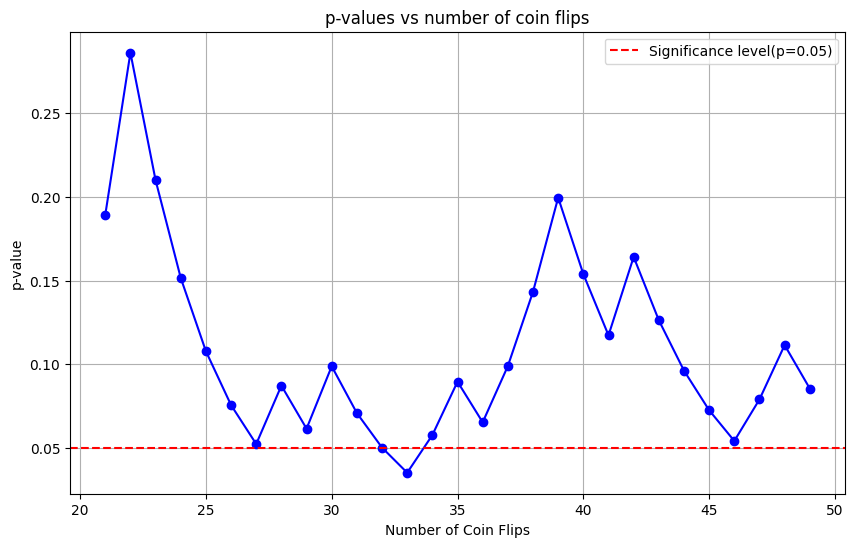

In [ ]:
#plot p value verus number of coin flips
plt.figure(figsize=(10,6))
plt.plot(n_values,p_values,marker='o',linestyle='-',color='blue')
plt.axhline(y=0.05,color='red',linestyle='--',label='Significance level(p=0.05)')
plt.title('p-values vs number of coin flips')
plt.xlabel('Number of Coin Flips')
plt.ylabel('p-value')
plt.legend()
plt.grid(True)
plt.show()


at flip 33 ,it dips below significance

so for every other value of 20 to50 points we dont have statistically significant result bcoz my coin is in fact fair coin and we are flispping the fair coin only so i should be fail to reject my null hypothesis,so desigining your n ahead of time is helpful


**PARAMETER ESTIMATION AND FITTING DISTRIBUTION**: alpha particles are emitted by ameicium241 ,example from rice,taken from berkson 1966 ,10220 gieger clicks (emissions) were measured ,specifiically time between clickand data is binned into 10 seconds intervals
clicks per 10 second interval should be poisson (time between is exponential)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time between the emissions is an exponential process and the number of emisisons in a fixed interval is  poisson distribution

In [ ]:
#data
clickspertenseconds=np.arange(18)#number of counts per 10 seconds interval
observedcounts=[1,6,11,28,56,105,126,146,164,161,123,101,74,53,23,15,9,5]

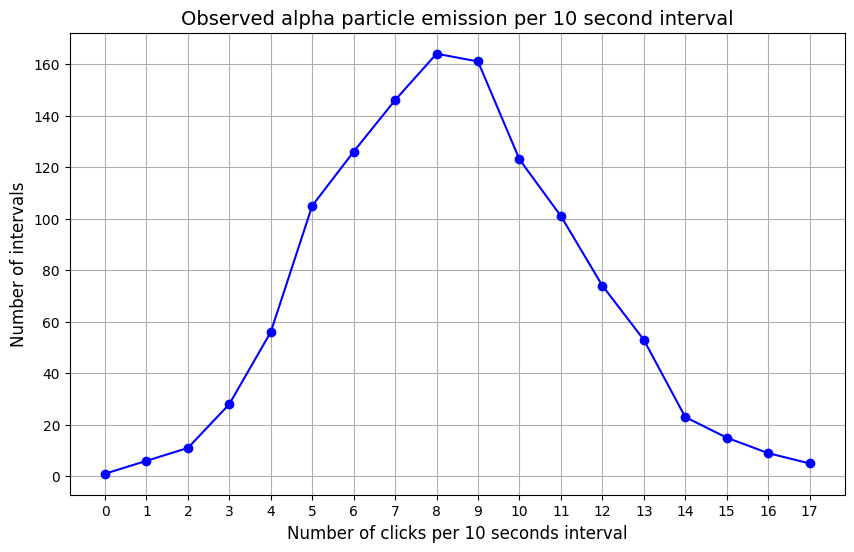

In [ ]:
#plotting the observed data
plt.figure(figsize=(10,6))
plt.plot(clickspertenseconds,observedcounts,marker='o',linestyle='-',color='blue',label='Observed Counts')
plt.title('Observed alpha particle emission per 10 second interval',fontsize=14)
plt.xlabel('Number of clicks per 10 seconds interval',fontsize=12)
plt.ylabel('Number of intervals',fontsize=12)
plt.grid(True)
#set x-axis to display integer ticks marks only
plt.xticks(ticks=np.arange(0,max(clickspertenseconds)+1,1))#set x axis ticks to integer
plt.show()